# Plotting Weather Readings

### Import the required libraries


In [1]:
import csv
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
# Lists to store processed data
start_times = []
end_times = []
temperatures = []


Reading in the CSV File "weatherreadings1.csv"

In [3]:


with open('weatherreadings1.csv', mode='r') as file:
    csv_reader = csv.reader(file)
    header = next(csv_reader)  # Skip header row
    
    for row in csv_reader:
        # Extracting the data columns we need, while ignoring the others: 
            # reportStartDateTime (row 1), 
            # reportEndDateTime (row 2), 
            # dryBulbTemperature_Celsius (row 12)
        start_time_str = row[1]  
        end_time_str = row[2]  
        temp_str = row[12]  

#this section took awhile to work out
        try:
            # Convert start and end date strings to datetime objects. 
                # https://docs.python.org/3/library/datetime.html#datetime.datetime.strptime
                # https://docs.python.org/3/tutorial/introduction.html#strings
            start_time = datetime.strptime(start_time_str, '%Y-%m-%dT%H:%M:%S%z')
            end_time = datetime.strptime(end_time_str, '%Y-%m-%dT%H:%M:%S%z')
            
            # Convert temperature to float
            temperature = float(temp_str)
            
            # Append the extracted data to the lists
            start_times.append(start_time)
            end_times.append(end_time)
            temperatures.append(temperature)
        except ValueError: # https://docs.python.org/3/library/logging.html
            print(f"Skipping row with invalid data: {row}")


## Plotting the Data

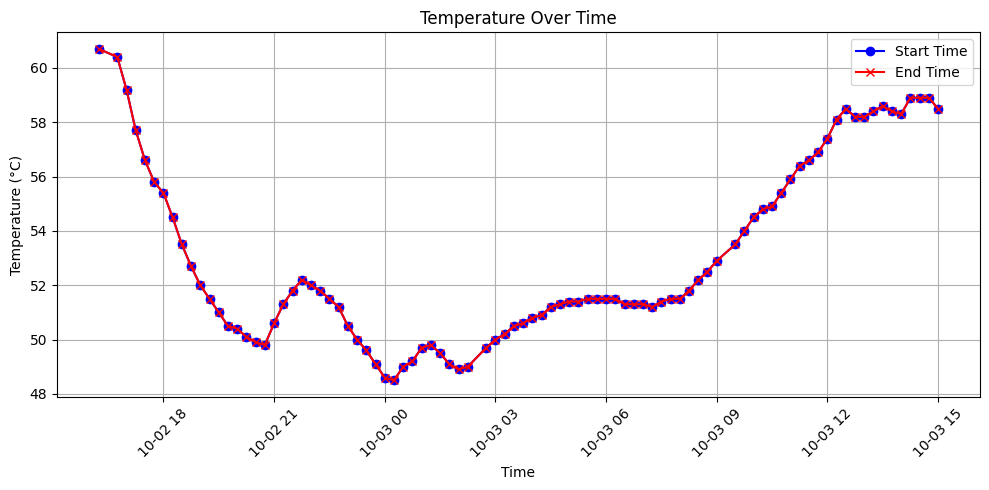

In [4]:

plt.figure(figsize=(10, 5))

# Plotting the start and end times against temperatures
plt.plot(start_times, temperatures, color='blue', marker='o', linestyle='-', label='Start Time')
plt.plot(end_times, temperatures, color='red', marker='x', linestyle='-', label='End Time')

# Relevant Labels
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# Rotate x-axis labels for clearer readability
plt.xticks(rotation=45)

# Add a legend to differentiate between start and end times
plt.legend()

# Adjust layout to avoid overlapping for asthetics
plt.tight_layout()

plt.show()


# Plot Conclusion

For the most part, the weather appears to fluctuate somewhat predictably, with a small increase and decrease in temperature of a rough range from 48-58 degrees Celcius.


# Resources:

1. datetime — Basic date and time types: https://docs.python.org/3/library/datetime.html

2. Matplotlib: Visualization with Python: https://matplotlib.org/stable/contents.html

3. csv — CSV file reading and writing: https://docs.python.org/3/library/csv.html